# Programming For Data Analysis Project 2021.

## Name: Sam Tracey
## Student ID: G00398245
## Date: January 2021

***

# Introduction.

The purpose of this project is to create a simulated data set based on a real-world phenomenon. Simulated data is synthetic data that is generated via algortihms rather than data that have been collected in the "real-world". The value in simulated data is that it can accurately reflect real world phenomenon mathematically or statistically and, in the Machine Learning Industry it has been found to be as good or even better at training AI models than it's real world counterpart. [1]

The challenge for us then is to create a synthetic, simulated data set which is represenatative of a real-world phenomenon based on available research and literature.


## Real World Phenomenon.

I have decided to generate a data set based on lifestyle factors that may increase a person's probability of having heart disease in Ireland.
Based on data from the Central Statistics Office (2020). Heart attacks and strokes are still one of the leading causes of mortality in Ireland with 8744 lives being lost to these conditions in 2020.[2]
The underlying cause of heart disease, heart attacks and strokes is atherosclerosis (the build up of fatty deposits that form plaques on the inner lining of the blood vessels).[3] The following lifestyle factors have been found to increase the chances of heart attacks [4]:

- Age
- Gender
- Smoking
- High Blood Pressure
- Diabetes
- Alcohol Consumption
- Physical Inactivity
- Diet
- Obesity
- Unrelieved Stress

Much of the research required for this project is available in the "Health Ireland Survey Report 2021" a copy of which is available [here](http://localhost:8888/files/Data/Health_Ireland_Survey_2021.pdf?_xsrf=2%7Cf7a4eb77%7Cdc69a39ecbea7f6855547c6189bce090%7C1637500309).

Our simulated dataset will contain 5000 entries and 9 fields. We will use <code>numpy.random</code> extensively to generate data for each field based on available research.

In [2]:
# Data Analysis and data manipulation.
import pandas as pd
# Scientific and mathematical computing.
import numpy as np
# Basic plotting package.
import matplotlib.pyplot as plt
# Advanced Plotting package.
import seaborn as sns

In [3]:
# Create our dataframe with relevant headers.
df = pd.DataFrame(columns=['Age', 'Gender', 'Smoker', 'High BP', 'Diabetes', 'Alcohol', 'Inactivity', 'BMI', 'Diet'])

## Simulating Age.

The variable age is a continuous integer and, for the purpises of our dataset we will only consider ages between 18 and 99 (inclusive). When we look at the age distribution for Ireland published after the 2016 census we see that it does not follow a normal distribution [5]:

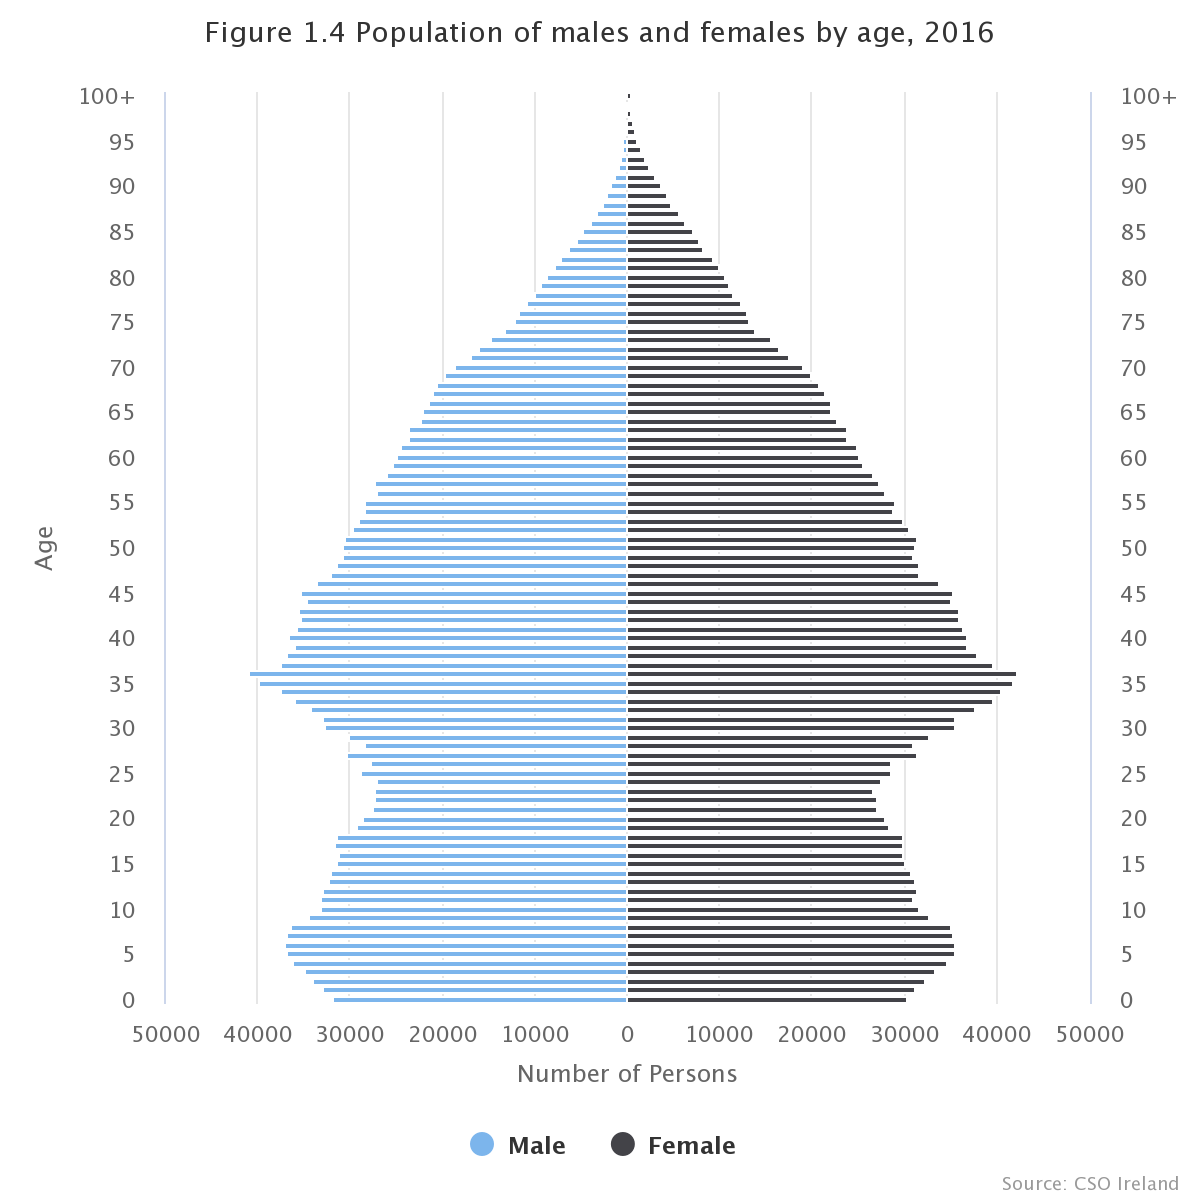

To accurately represent the age profile of the population in our simulated dataset I decided to use the <code>numpy.random.choice</code> function with a 1 dimensional array of probabilities for each of the ages between 18 and 99. Luckily, the Central Statistics Office provides us with the number of people for each given age in the population. The data is available at the following [link](http://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EY007&PLanguage=0). To calculate the probability for each age we simply divide the count for each age by the total population between the ages of 18 and 99.

In [4]:
# Create array of ages between 18 and 99.
ages = np.arange(18, 100)

In [5]:
# Create 1d array of probabilities for each age.
prob = [0.017165, 0.016123, 0.015777, 0.015233, 0.015221, 0.015104,
        0.015294, 0.016040, 0.015754, 0.017265, 0.016650, 0.017584,
        0.019140, 0.019136, 0.020099, 0.021200, 0.021792, 0.022836,
        0.023298, 0.021615, 0.020914, 0.020391, 0.020559, 0.020156,
        0.019931, 0.019964, 0.019494, 0.019731, 0.018821, 0.017822,
        0.017627, 0.017323, 0.017359, 0.017306, 0.016854, 0.016496,
        0.015979, 0.016034, 0.015376, 0.015251, 0.014682, 0.014297,
        0.013964, 0.013791, 0.013246, 0.013274, 0.012614, 0.012365,
        0.012195, 0.011885, 0.011591, 0.011118, 0.010591, 0.009693,
        0.009082, 0.008463, 0.007614, 0.007127, 0.006920, 0.006537,
        0.006018, 0.005734, 0.005401, 0.004991, 0.004576, 0.004056,
        0.003670, 0.003346, 0.002893, 0.002460, 0.002066, 0.001798,
        0.001506, 0.001226, 0.000957, 0.000765, 0.000579, 0.000434,
        0.000339, 0.000207, 0.000126, 0.000089]

In [6]:
# Create numpy array of 5000 ages based on probabilities.
age = np.random.choice(ages, 5000, p=prob)

In [7]:
# Change seaborn theme and set figure size.
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(12,8)})

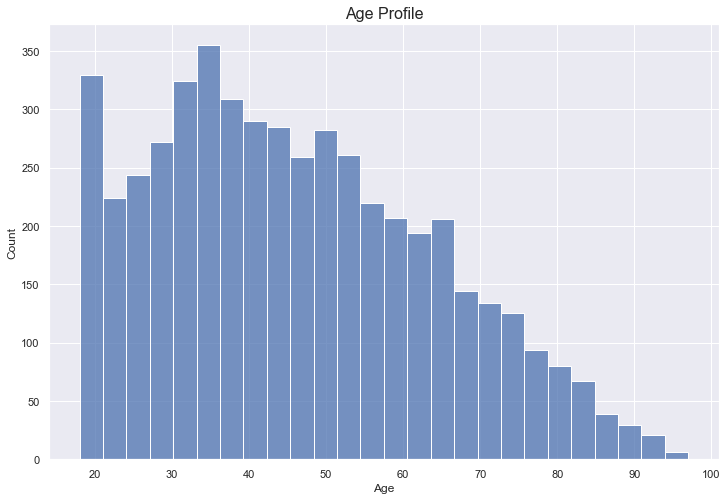

In [8]:
# Create Histplot for simulated age.
ax = sns.histplot(age)
# Add title and labels.
ax.set_title('Age Profile', fontsize=16)
ax.set_xlabel('Age')
plt.show()

In [9]:
# Assign Age values from numpy array for dataframe.
df['Age'] = age

In [10]:
# Reviewing the Average age and median age in our age array.
print(f'The Average age of our simulated data is {np.mean(age)}')
print(f'The Median age of our simulated data is {np.median(age)}')

The Average age of our simulated data is 46.1952
The Median age of our simulated data is 44.0


## Simulating Gender.

Gender is a categorical variable with only two options - Male or Female.

According to the Central Statistics Office, based on the 2016 census there were 97.8 males for every 100 females in Ireland [6]. To simulate the genders for our data set we can again use this fact and create probabilities for each of the genders. The probability for the male category = 0.4945 and the probability for the female category = 0.5055. Once again, we can use the <code>numpy.random.choice</code> function with these probabilities to create an array for gender which is representative of the population of Ireland.



In [11]:
# Create array with genders.
genders = ['Female', 'Male']
# Define probability for each gender.
prob = [0.5055, 0.4945]
# create numpy array for genders.
gender = np.random.choice(genders, 5000, p = prob)

In [12]:
gender

array(['Female', 'Female', 'Male', ..., 'Female', 'Female', 'Male'],
      dtype='<U6')

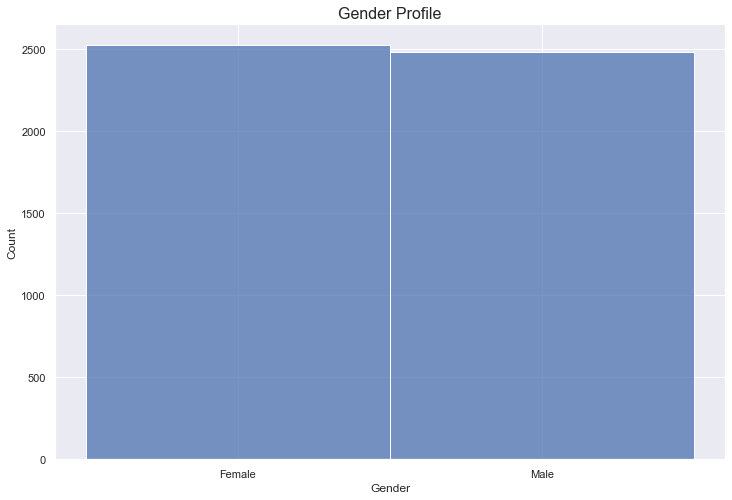

In [13]:
# Create Histplot for simulated gender.
ax = sns.histplot(gender)
# Add title and labels.
ax.set_title('Gender Profile', fontsize=16)
ax.set_xlabel('Gender')
plt.show()

In [14]:
# Count the number of males and females in our data set.
females = np.count_nonzero(gender == 'Female')
males = np.count_nonzero(gender == 'Male')

print(f'There are {females} females in our dataset and {males} Males.')
print(f'There are {(males/females)*100} males for every 100 females.')

There are 2522 females in our dataset and 2478 Males.
There are 98.25535289452814 males for every 100 females.


In [15]:
df['Gender'] = gender

In [16]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Diet
0,44,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Simulating Smoker Data.

According to the Health Service Executive in 2020 the prevalence of somoking in Ireland was 15.4%. In the analysis performed in the [Smoking Prevalence Tracker 2020 Info-graph ](https://www.hse.ie/eng/about/who/tobaccocontrol/research/smoking-in-ireland-2020.pdf) we see that there is a difference in smoking rates between genders and across ages. 18.1% of males were calssified as smokers while 12.7% of females were smokers.

By age group, the highest prevalence of smoking was in the 25-34 year olds while the lowest prevalence was in the 65+ age category [7].


Angie Brown, Medical Director for the Irish Heart Foundation has stated that [8]:

> Smoking contributes to the long-term clogging or narrowing of the arteries and increases the risk of blood clots.
> These clots can suddenly block an artery completely causing a heart attack or stroke.

We can use the data for smoking prevalence by age category and gender to calculate probabilities for each group. Once the probabilities have been calculated we can once again use the <code>numpy.random.choice</code> function to assign a value for smoker based on these probabilities.

The Smoker variable in our data set will be a binary categorical variable with two possible values. If the person is a smoker the value will be Yes, if they are not a smoker the value will be No.





In [17]:
# Create array for smoker.
# 1 - does smoke, 0 = does not smoke.
smoke = ['Yes','No']

In [18]:
# Create a function to assign smoker value based on age and sex.

def smoker(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.208, 0.792])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.146, 0.854])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.247, 0.753])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.173, 0.827])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.221, 0.779])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.1551, 0.8449])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.1728, 0.8272])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.1213, 0.8787])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.1821, 0.8179])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.1279, 0.8721])
    if row['Age']> 64 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.0893, 0.9107])
    if row['Age']> 64 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.0627, 0.9373])
    return 'N/A'

In [19]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['Smoker'] = df.apply (lambda row: smoker(row), axis=1)

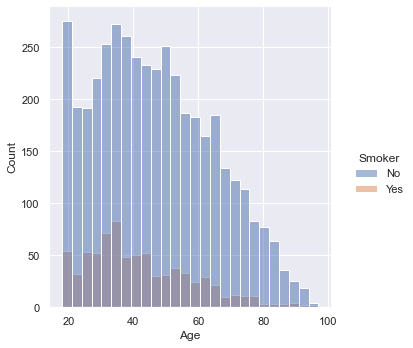

In [20]:
# Plot Distribution of smokers by age.
ax = sns.displot(x="Age", hue="Smoker", data=df)

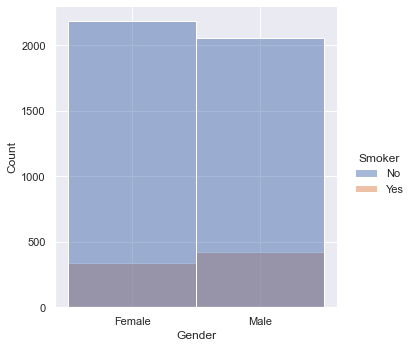

In [21]:
# Plot distribution of smokers by Gender.
ax = sns.displot(x="Gender", hue="Smoker", data=df)

In [22]:
# Create new dataframe grouped by Age.
age_df = df.groupby('Age')['Smoker'].value_counts(normalize=True)
# Calculate percentage values for smokers by age.
age_df = age_df.mul(100).rename('Percent').reset_index()

In [23]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 25, 35, 45, 55, 65, 100]
# Use Pandas cut function to segment ages into age ranges [10]
age_df['Age_Range'] = pd.cut(age_df['Age'], bins=bins, labels=age_range)

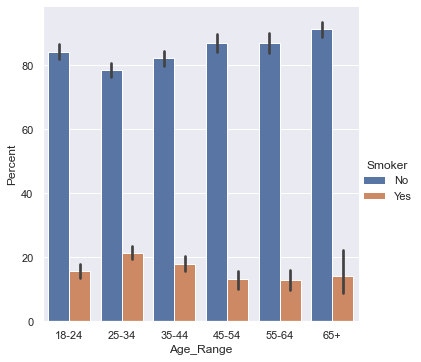

In [24]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='Smoker', kind='bar', data=age_df)

In [25]:
# Create new dataframe grouped by Gender.
gender_df = df.groupby('Gender')['Smoker'].value_counts(normalize=True)
# Calculate percentage values for smokers by gender.
gender_df = gender_df.mul(100).rename('Percent').reset_index()

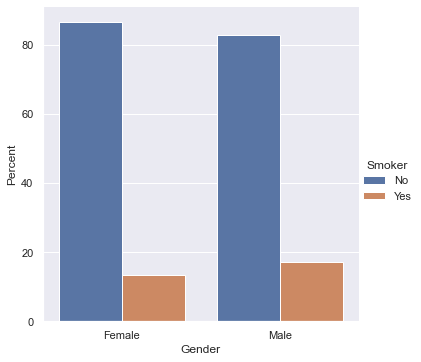

In [26]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='Smoker', kind='bar', data=gender_df)

# Simulating High Blood Pressure.

According to the Healthy Ireland Survey Report 2021, 6% of all men and 7% of all women who took part in the survey are currently living with high blood pressure. Their data analysis also shows a much higher prevalence of high blood pressure by age group[11].

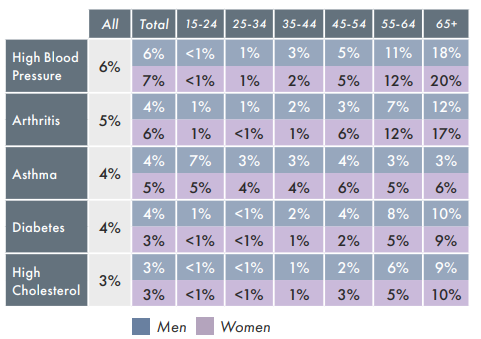


Blood pressure is measured by two numbers:

- The systolic pressure (higher of the two numbers) which measures the pressure as your heart is squeezing blood out.
- The diastolic pressure (lower of the two numbers) which measures the pressure when your heart relaxes to allow blood to flow back into it. [12]

According to the Centre for Disease Control [13]:

> High blood pressure can damage your arteries by making them less elastic, which decreases the flow of blood and oxygen to your heart and leads to heart disease. In addition, decreased blood flow to the
> heart can cause:

> 1. Chest pain, also called angina.
> 2. Heart attack, which happens when the blood supply to your heart is blocked and heart muscle begins to die without enough oxygen. The longer the blood flow is blocked, the greater the damage to the
>    heart.
> 3. Heart failure, a condition that means your heart can’t pump enough blood and oxygen to your other organs.

As with our "Smoker" variable High BP will be a binary categorical variable with two possible values. If the person has high blood pressure the value will be Yes, if not the value will be No.
We will use the <code>numpy.random.choice</code> with the statistics from the Healthy Ireland Survey Report to create our simulated data.

In [27]:
high_bp = ['Yes','No']

In [28]:
# Create a function to assign Blood Pressure value based on age and sex.

def bp(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.005, 0.995])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.005, 0.995])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.01, 0.99])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.01, 0.99])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.03, 0.97])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.04, 0.96])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.05, 0.95])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.05, 0.95])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.11, 0.89])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.12, 0.88])
    if row['Age']> 64 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.18, 0.82])
    if row['Age']> 64 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.20, 0.8])
    return 'N/A'

In [29]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['High BP'] = df.apply (lambda row: bp(row), axis=1)

In [30]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Diet
0,44,Female,No,No,NaN,NaN,NaN,NaN,NaN
1,65,Female,No,No,NaN,NaN,NaN,NaN,NaN
2,39,Male,No,No,NaN,NaN,NaN,NaN,NaN
3,87,Female,No,No,NaN,NaN,NaN,NaN,NaN
4,79,Female,No,Yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,59,Female,No,No,NaN,NaN,NaN,NaN,NaN
4996,36,Female,Yes,No,NaN,NaN,NaN,NaN,NaN
4997,45,Female,No,Yes,NaN,NaN,NaN,NaN,NaN
4998,67,Female,No,No,NaN,NaN,NaN,NaN,NaN


In [31]:
# Create new dataframe grouped by Age.
bp_age_df = df.groupby('Age')['High BP'].value_counts(normalize=True)
# Calculate percentage values for smokers by age.
bp_age_df = bp_age_df.mul(100).rename('Percent').reset_index()

In [32]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 25, 35, 45, 55, 65, 100]
# Use Pandas cut function to segment ages into age ranges [10]
bp_age_df['Age_Range'] = pd.cut(bp_age_df['Age'], bins=bins, labels=age_range)

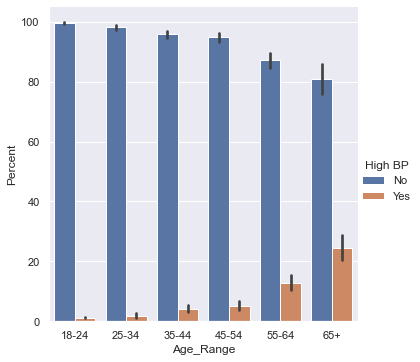

In [33]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='High BP', kind='bar', data=bp_age_df)

In [34]:
# Create new dataframe grouped by Gender.
bp_gender_df = df.groupby('Gender')['High BP'].value_counts(normalize=True)
# Calculate percentage values for smokers by gender.
bp_gender_df = bp_gender_df.mul(100).rename('Percent').reset_index()

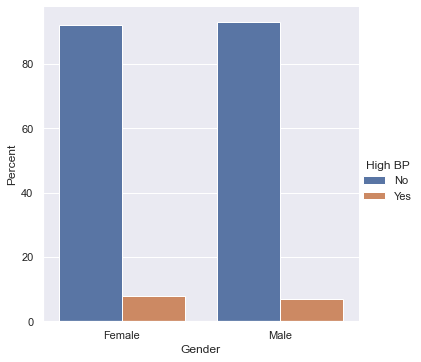

In [35]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='High BP', kind='bar', data=bp_gender_df)

# Simulating Diabetes Data.

According to the Healthy Ireland Survey Report 2021, 4% of all men and 3% of all women in who responded to the survey reported that they had diabetes. Once again we see that the risk of diabetes is dependent on age as well as gender[14].

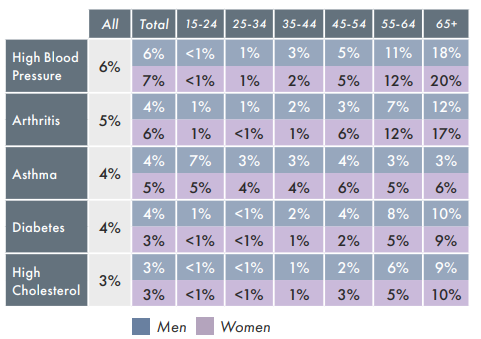


The International Diabetes Federation staes that diabetes is:

> a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces.

> Not being able to produce insulin or use it effectively leads to raised glucose levels in the blood (known as hyperglycaemia). Over the long-term high glucose levels are associated with damage to the
> body and failure of various organs and tissues.[15]

There are three types of diabetes:

- Type 1 diabetes: Mostly occurs in children and adolescents.
- Type 2 diabetes: Mostly occurs in adults and accounts for more than 90% of cases.
- Gestational diabetes: Occurs during pregnancy but usually diappears after preganancy.

According to John Hopkins Medicine, people with diabetes are two to four times more likely to develop heart disease. [16]

As with our Smoker and High BP simulate data, the Diabetes variable will be categorical with two potential values - Yes or No. 
We will use the <code>numpy.random.choice</code> with the statistics from the Healthy Ireland Survey Report to create our simulated data.

In [36]:
diab = ['Yes','No']

In [37]:
def diabetes(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.01, 0.99])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.005, 0.995])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.005, 0.995])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.005, 0.995])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.02, 0.98])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.01, 0.99])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.04, 0.96])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.02, 0.98])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.08, 0.92])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.05, 0.95])
    if row['Age']> 64 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.10, 0.90])
    if row['Age']> 64 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.09, 0.91])
    return 'N/A'

In [38]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['Diabetes'] = df.apply (lambda row: diabetes(row), axis=1)

In [39]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Diet
0,44,Female,No,No,No,NaN,NaN,NaN,NaN
1,65,Female,No,No,No,NaN,NaN,NaN,NaN
2,39,Male,No,No,No,NaN,NaN,NaN,NaN
3,87,Female,No,No,No,NaN,NaN,NaN,NaN
4,79,Female,No,Yes,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,59,Female,No,No,No,NaN,NaN,NaN,NaN
4996,36,Female,Yes,No,No,NaN,NaN,NaN,NaN
4997,45,Female,No,Yes,No,NaN,NaN,NaN,NaN
4998,67,Female,No,No,No,NaN,NaN,NaN,NaN


In [40]:
# Create new dataframe grouped by Age.
diab_age_df = df.groupby('Age')['Diabetes'].value_counts(normalize=True)
# Calculate percentage values for smokers by age.
diab_age_df = diab_age_df.mul(100).rename('Percent').reset_index()

In [41]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 25, 35, 45, 55, 65, 100]
# Use Pandas cut function to segment ages into age ranges [10]
diab_age_df['Age_Range'] = pd.cut(diab_age_df['Age'], bins=bins, labels=age_range)

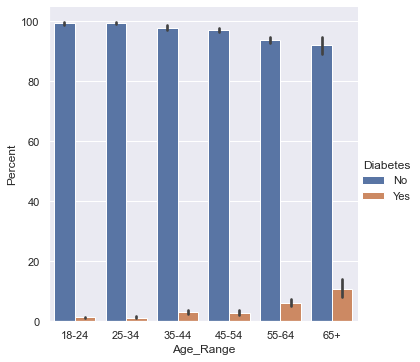

In [42]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='Diabetes', kind='bar', data=diab_age_df)

In [43]:
# Create new dataframe grouped by Gender.
diab_gender_df = df.groupby('Gender')['Diabetes'].value_counts(normalize=True)
# Calculate percentage values for smokers by gender.
diab_gender_df = diab_gender_df.mul(100).rename('Percent').reset_index()

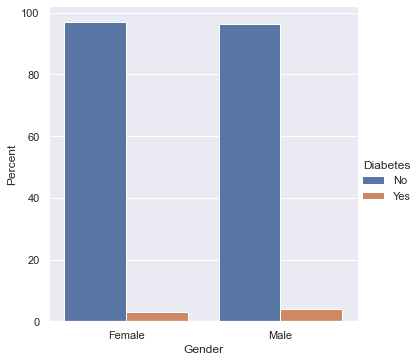

In [44]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='Diabetes', kind='bar', data=diab_gender_df)

# Simulating Alcohol Consumption.

66% of people who repsonded to the Healthy Ireland survey reported that they had drunk alcohol in the six months prior to the survey. There is a gender dependency with men drinking more (68%) than women (63%) and there is differences across the age ranges with those in the 75+ category drinking much less. [17]

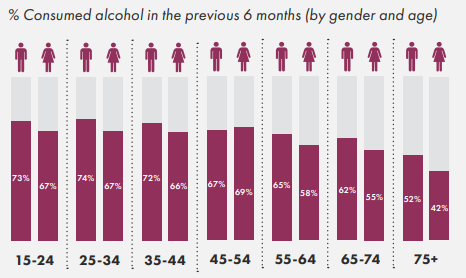

The link between alcohol consumption and heart disease is not as clear cut as our previous variables. John Hopkins cardiologist, John McEvoy noted that there was some evidence that moderate amounts of alcohol might help to slightly raise levels of “good” HDL cholesterol thereby reducing the risk of cardiovasular disease. [18] What there does seem to be concensus on is that there is evidence of a causal relationship between higher alcohol consumption and increased risk of stroke and peripheral artery disease. [19]


For the purpose of our simulated data I have decided that we will use the available data for "Binge drinking" of alcohol rather than low or moderate levels.

According to the HSE:

> Binge drinking is defined as drinking six or more standard drinks in one sitting. Common examples of one standard drink are a half pint of lager/stout/cider, a 100ml glass of wine (at 12.5% ABV)
> or pub measure (35.5ml) of spirits. On average, it takes one hour for the body to process one standard drink. [20]

The Healthy Ireland Survey also provides data on the percentage of respondents in various age groups who binge drink:


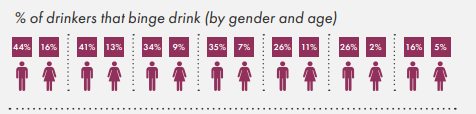

We will use this data sert to simulate our Alcohol Consumption categorical variable. Once again, Yes will indicate that the person does binge drink, No will indicate that they do not.

It is worth pointing out that the age ranges are slightly different for this data set compared to the preceding ones.

In [45]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Diet
0,44,Female,No,No,No,NaN,NaN,NaN,NaN
1,65,Female,No,No,No,NaN,NaN,NaN,NaN
2,39,Male,No,No,No,NaN,NaN,NaN,NaN
3,87,Female,No,No,No,NaN,NaN,NaN,NaN
4,79,Female,No,Yes,No,NaN,NaN,NaN,NaN


In [46]:
binge = ['Yes', 'No']

In [47]:
def alcohol(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.44, 0.56])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.16, 0.84])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.41, 0.59])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.13, 0.87])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.34, 0.66])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.09, 0.91])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.35, 0.65])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.07, 0.93])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.26, 0.74])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.11, 0.89])
    if row['Age']<= 74 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.26, 0.74])
    if row['Age']<= 74 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.02, 0.98])
    if row['Age']> 74 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.16, 0.84])
    if row['Age']> 74 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.05, 0.95])
    return 'N/A'

In [48]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['Alcohol'] = df.apply (lambda row: alcohol(row), axis=1)

In [49]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Diet
0,44,Female,No,No,No,No,NaN,NaN,NaN
1,65,Female,No,No,No,No,NaN,NaN,NaN
2,39,Male,No,No,No,No,NaN,NaN,NaN
3,87,Female,No,No,No,No,NaN,NaN,NaN
4,79,Female,No,Yes,No,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,59,Female,No,No,No,No,NaN,NaN,NaN
4996,36,Female,Yes,No,No,No,NaN,NaN,NaN
4997,45,Female,No,Yes,No,No,NaN,NaN,NaN
4998,67,Female,No,No,No,No,NaN,NaN,NaN


In [50]:
# Create new dataframe grouped by Age.
alc_age_df = df.groupby('Age')['Alcohol'].value_counts(normalize=True)
# Calculate percentage values for smokers by age.
alc_age_df = alc_age_df.mul(100).rename('Percent').reset_index()

In [51]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
bins = [0, 25, 35, 45, 55, 65, 75, 100]
# Use Pandas cut function to segment ages into age ranges [10]
alc_age_df['Age_Range'] = pd.cut(alc_age_df['Age'], bins=bins, labels=age_range)

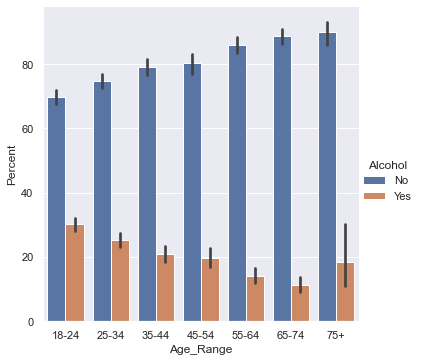

In [52]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='Alcohol', kind='bar', data=alc_age_df)

In [53]:
# Create new dataframe grouped by Gender.
alc_gender_df = df.groupby('Gender')['Alcohol'].value_counts(normalize=True)
# Calculate percentage values for smokers by gender.
alc_gender_df = alc_gender_df.mul(100).rename('Percent').reset_index()

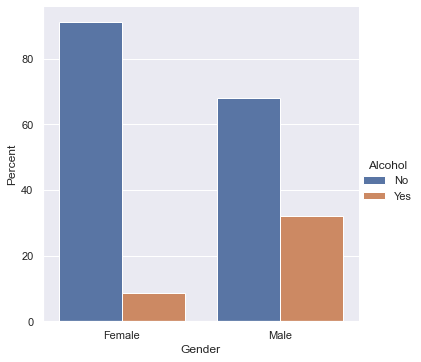

In [54]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='Alcohol', kind='bar', data=alc_gender_df)

In [55]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Diet
0,44,Female,No,No,No,No,NaN,NaN,NaN
1,65,Female,No,No,No,No,NaN,NaN,NaN
2,39,Male,No,No,No,No,NaN,NaN,NaN
3,87,Female,No,No,No,No,NaN,NaN,NaN
4,79,Female,No,Yes,No,No,NaN,NaN,NaN


## Physical Activity.

The most recent data we have by age range for the percentage of adults achieivng the recommended physical activity guidelines was published in 2019. The Irish Physical Activity Research Collaboration (I-PARC) published the following inforgraphic:

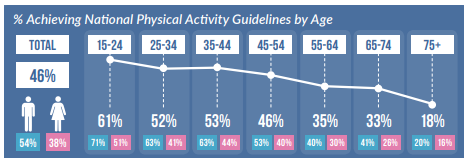

Once again, we see a gender and age dependency for physical activity with younger cohorts being more active than older cohorts and males being more active than females.



## References.

[1] Andrews, G. What Is Synthetic Data? (2021). Available at: https://blogs.nvidia.com/blog/2021/06/08/what-is-synthetic-data/ accessed December 2021.

[2] Shannon, J. Decline in deaths from heart disease and stroke in 2020 (2021). Available at: https://irishheart.ie/news/decline-in-deaths-from-heart-disease-and-stroke-in-2020/ accessed December 2021.

[3] Irish Heart.ie, Cardiovascular Disease (2021) Available at: https://irishheart.ie/heart-and-stroke-conditions-a-z/cardiovascular-disease/#section-causes accessed December 2021.

[4] Irish Heart.ie, Cardiovascular Disease (2021) Available at: https://irishheart.ie/heart-and-stroke-conditions-a-z/cardiovascular-disease/#section-causes accessed December 2021.

[5] Central Statistics Office, Census of Population 2016 - Profile 3 An Age Profile of Ireland (2017). Available at: https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/assr/ accessed December 2021.

[6]Central Statistics Office, Age and sex composition (2017) Available at: https://www.cso.ie/en/media/csoie/releasespublications/documents/population/2017/Chapter_3_Age_and_sex_composition.pdf accessed December 2021.

[7] Health Service Executive, Smoking Prevalence Tracker 2020 Info-graph (2021). Available at: https://www.hse.ie/eng/about/who/tobaccocontrol/research/smoking-in-ireland-2020.pdf accessed December 2020.

[8] Shannon, J. Tobacco breaks hearts every day (2021). Available at: https://irishheart.ie/news/smokers-under-40-five-times-more-likely-to-have-heart-attack/ accessed December 2021. 

[9] StackOverflow, pandas create new column based on values from other columns / apply a function of multiple columns, row-wise (2014). Available at: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o accessed December 2021.

[10] Sucky, R. N. Data Binning with Pandas Cut or Qcut Method. Available at: https://towardsdatascience.com/sort-and-segment-your-data-into-bins-to-get-sorted-ranges-pandas-cut-and-qcut-7785931bbfde accessed December 2021.

[11] Department of Health, Healthy Ireland Survey 2021 Summary Report (2021). Available at: https://assets.gov.ie/206563/1a5b7bd5-be4c-43a5-9d6b-0daa273c849b.pdf accessed December 2021.


[12] Irishheart.ie, Blood Pressure (2021) Available at: https://irishheart.ie/how-to-keep-your-heart-healthy/blood-pressure/ accessed December 2021.

[13] Centers for Disease Control and Prevention, High Blood Pressure Symptoms and Causes. Available at: https://www.cdc.gov/bloodpressure/about.htm accessed December 2021.

[14] Department of Health, Healthy Ireland Survey 2021 Summary Report (2021). Available at: https://assets.gov.ie/206563/1a5b7bd5-be4c-43a5-9d6b-0daa273c849b.pdf accessed December 2021.

[15] International Diabetes Federation, What Is Diabetes (2020). Available at: https://www.idf.org/aboutdiabetes/what-is-diabetes.html accessed Decemer 2021.

[16] John Hopkins Medicine, Diabetes and Heart Disease. Available at: https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-heart-disease accessed December 2021.

[17] Department of Health, Healthy Ireland Survey 2021 Summary Report (2021). Available at: https://assets.gov.ie/206563/1a5b7bd5-be4c-43a5-9d6b-0daa273c849b.pdf accessed December 2021.

[18] McEvoy, J. W. Alcohol and Heart Health: Separating Fact from Fiction. Available at: https://www.hopkinsmedicine.org/health/wellness-and-prevention/alcohol-and-heart-health-separating-fact-from-fiction accessed December 2021.

[19] Larsson, S.C., Burgess, S., Mason, A. M.,  Michaëlsson, K. Alcohol Consumption and Cardiovascular Disease (2020). Available at: https://www.ahajournals.org/doi/10.1161/CIRCGEN.119.002814 accessed December 2021.

[20] Drinks Ireland, IBEC. Binge Drinking (2020) Available at: https://www.ibec.ie/drinksireland/news-insights-and-events/insights/2021/02/25/binge-drinking accessed December 2020.


